# Objectives
1. Summary data
  - 1.1 Descriptive and inferential statistics
  - 1.2 Measures of centre
  - 1.3 Measures of spread
2. Random Numbers and Probability
  - 2.1 Probability
  - 2.2 Discrete distributions
  - 2.3 Continuous distributions
  - 2.4 The binomial distributions
3. More Distributions and the Central Limit Theorem
  - 3.1 The normal distribution
  - 3.2 The central limit theorem
  - 3.3 The possion distribution
  - 3.4 More probability distributions 
4. Correlation and Experimental Design
  - 4.1 Correlation
  - 4.2 Correlation caveats
  - 4.3 Design of experiments

## 1. Summary data

### 1.1 Descriptive and inferential statistics
- describle and summarize data 
- Use a sample of data to make inferences about a larger population

### 1.2 Measures of centre
- median: np.median()
- mean: np.mean() 
- histograms

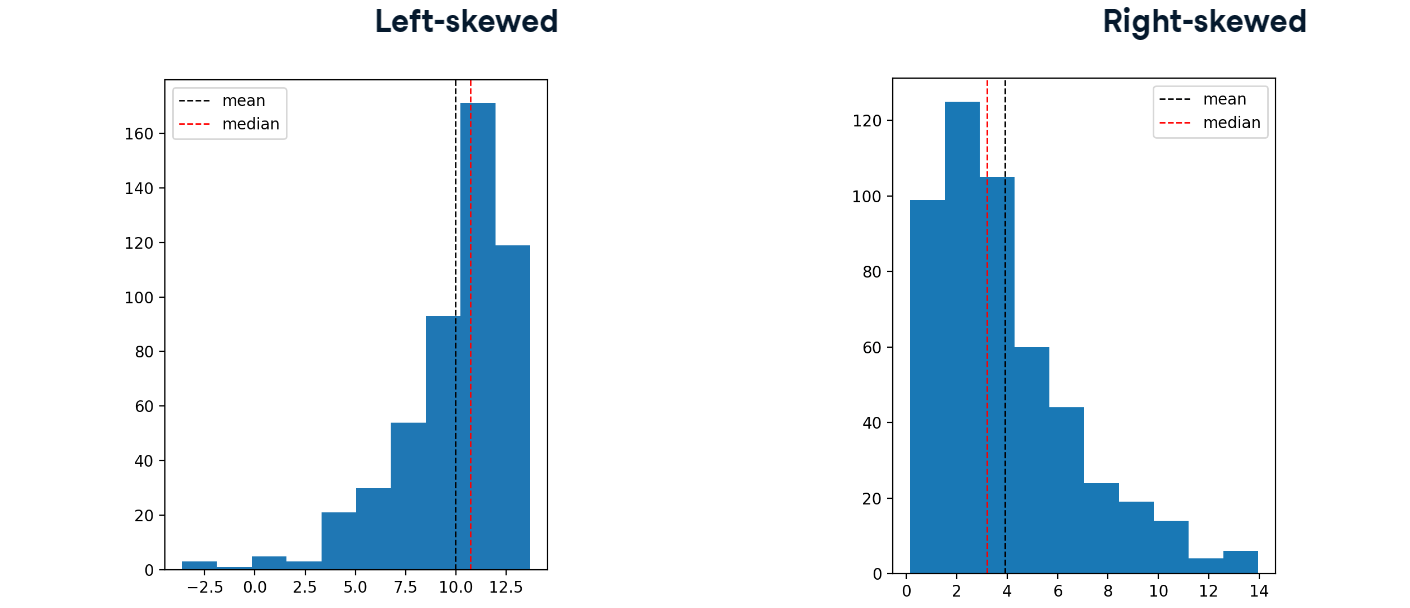

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/QXJ/Python/Datacamp/Statistics/food_consumption.csv'
food_consumption = pd.read_csv(path, index_col = 0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [7]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[food_consumption['country'].isin(['Belgium','USA'])]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


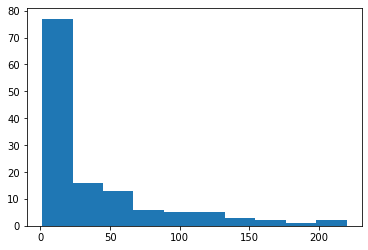

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean','median']))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


### 1.3 Measures of spread 
- variance: **np.var(data, ddof = 1)** - ddof = 1 is sample variance
- standard deviation: **np.std(data, ddof = 1)**
- mean absolute devation: **np.mean(np.abs(col - mean(col)))**
- quantiles: 
  - **np.quantile(data, 0.5)** = median / np.quantile(array, [0, 0.25, 0.5, 0.75, 1])
  - np.linspace(start, stop, num): 
  - boxplots
- using IQR to identify Outliers: data < Q1-1.5*IQR or data > Q1+1.5*IQR
  - **np.linspace(start, end, num)**

**Standard deviation vs. mean absolute deviation**
- Standard deviation squares distances, penalizing longer distance more than shorter ones. 
- Mean absolute deviation penalizes each distance equally.
- SD is more common used.

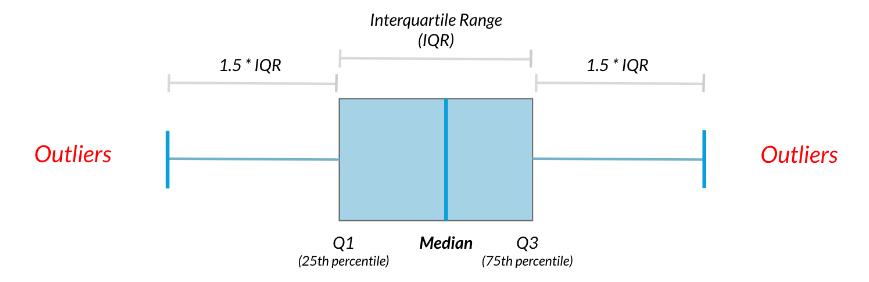

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


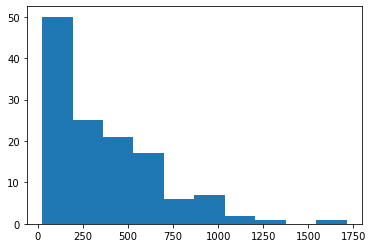

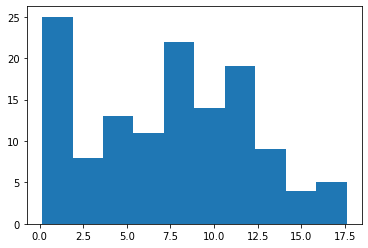

In [10]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt 

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category']=='beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category']=='eggs']['co2_emission'])
# Show plot
plt.show()

In [11]:
# Calculate the quartiles of co2_emission: median
import numpy as np
from scipy.stats import iqr

print(iqr(food_consumption['co2_emission']))
print(np.linspace(0,1,5))
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,5)))

57.3875
[0.   0.25 0.5  0.75 1.  ]
[   0.        5.21     16.53     62.5975 1712.    ]


In [12]:
import numpy as np
from scipy.stats import iqr

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower)| (emissions_by_country > upper) ]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## 2. Random Numbers and Probability

### 2.1 Probability
- Independent: *two events are dependent if the probability of the second event is affected by the outcome of the first event.* 
- Sampling with replacement = each pick is independent: **df[col].sample()**
- Sampling without replacement: **df[col].sample(2)**
  

**Calculating probability**

In [4]:
path = '/QXJ/Python/Datacamp/Statistics/amir_deals.csv'
amir_deals = pd.read_csv(path, index_col = 0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [5]:
# samples without replacement
np.random.seed(10)
amir_deals['product'].sample()

70    Product J
Name: product, dtype: object

In [6]:
# samples with replacement, default is without replacements
np.random.seed(10)
amir_deals['product'].sample(2)

70     Product J
104    Product E
Name: product, dtype: object

In [8]:
# samples without replacement
np.random.seed(10)
amir_deals['product'].sample(5)

70     Product J
104    Product E
21     Product F
117    Product B
57     Product D
Name: product, dtype: object

In [7]:
# samples with replacement
np.random.seed(10)
amir_deals['product'].sample(5, replace = True)

10     Product B
126    Product C
16     Product B
65     Product B
114    Product B
Name: product, dtype: object

In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts/np.sum(counts)
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


**Sampling deals**

In [9]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11
       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


### 2.2 Discrete distributions
- **Probability distribution**: describes the probability of each possible outcome in a scenario -> probability = area
- Expected value: mean of probability distribution
- Law of large numbers: at the size of your sample increases, the sample mean will approach the expected value

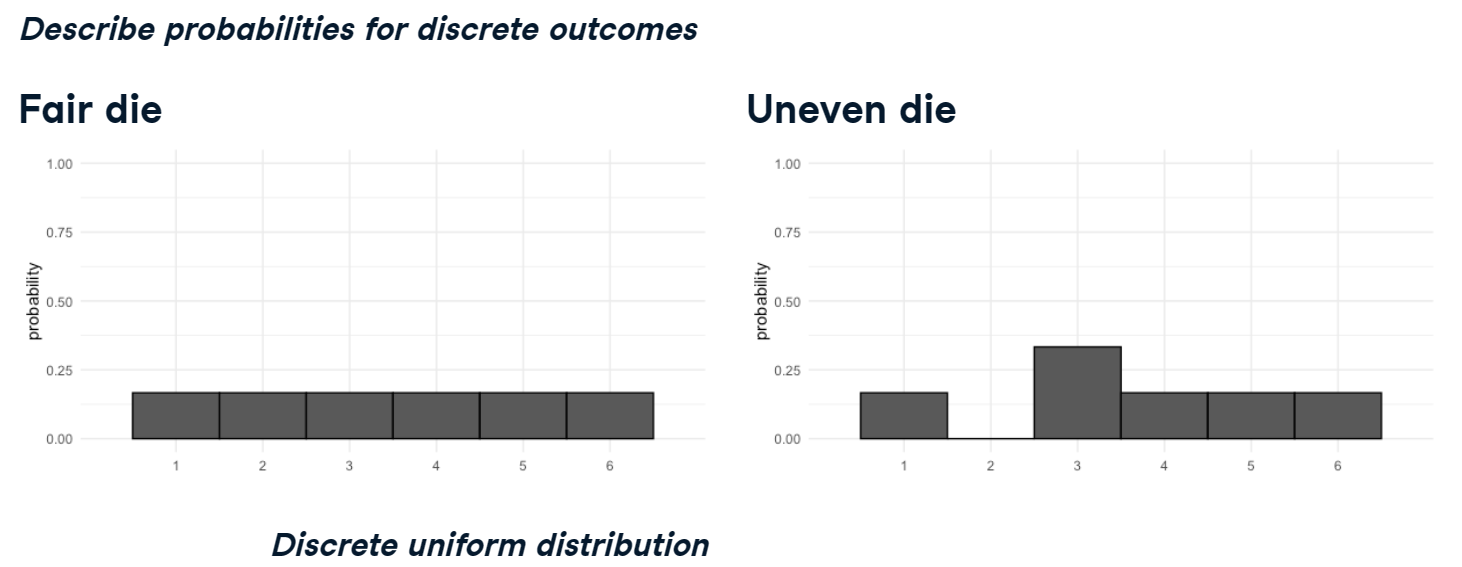

In [30]:
import pandas as pd
lst1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
lst2 = [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
restaurant_group = pd.DataFrame(list(zip(lst1, lst2)),
                                        columns = ['group_id', 'group_size'])
restaurant_group

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


In [40]:
# frequency table 
restaurant_group['group_size'].value_counts()

2    6
4    2
6    1
3    1
Name: group_size, dtype: int64

In [41]:
restaurant_group.shape[0]

10

In [43]:
len(restaurant_group)

10

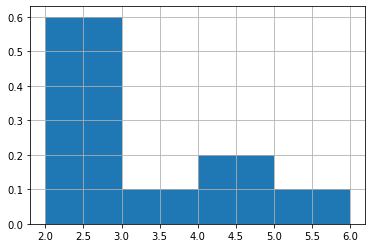

In [35]:
# Create a histogram of restaurant_groups and show plot
restaurant_group['group_size'].hist(bins = [2,3,4,5,6],
                                    density = True)
plt.show()
# probability distribution

In [44]:
# Create probability distribution
size_dist = restaurant_group['group_size'].value_counts() / restaurant_group.shape[0]
print(size_dist)
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2    0.6
4    0.2
6    0.1
3    0.1
Name: group_size, dtype: float64
2.9000000000000004


In [45]:
print(type(size_dist))

<class 'pandas.core.frame.DataFrame'>


In [46]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
print(groups_4_or_more)

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

   group_size  prob
1           4   0.2
2           6   0.1
0.30000000000000004


### 2.3 Continuous uniform distributions
- **Uniform distribution**: every value has the same probability
- **Cumulative distribution function (cdf)**: A CDF or cumulative distribution function plot is basically a graph with on the X-axis the sorted values and on the Y-axis the cumulative distribution.
- **Random Variates (rvs)**: generate random numbers according to uniform distribution

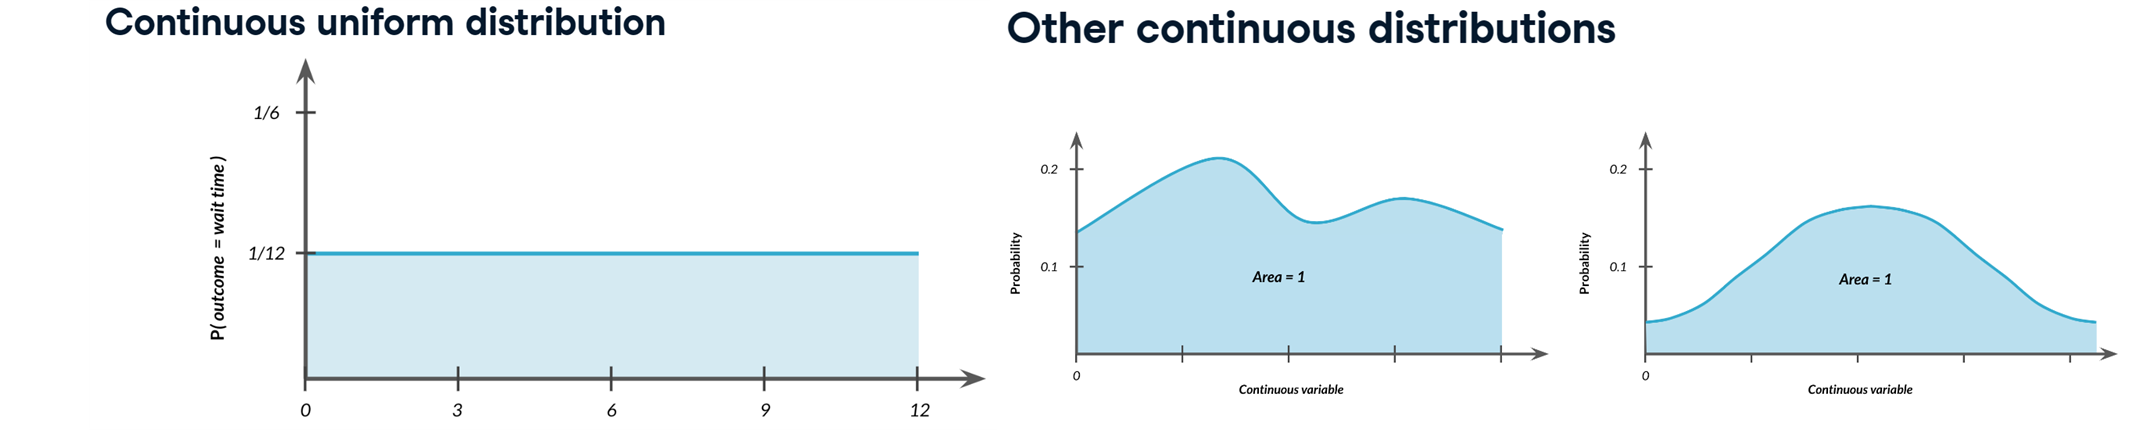

In [3]:
# Calculate the probability of 7 between 0 to 12
# lower limits of 0 and upper limits of 12
from scipy.stats import uniform 

#  P(waiting time <= 7 min, lower, upper)
print(uniform.cdf(7, 0, 12)) 

#  P(waiting time > 7 min)
print(1 - uniform.cdf(7, 0, 12)) 


#  P(4 min < waiting time < 7 min)
print(uniform.cdf(4, 0, 12) - uniform.cdf(7, 0, 12)) 

# P(< 12min)
print(uniform.cdf(12,0,12))

0.5833333333333334
0.41666666666666663
-0.25000000000000006
1.0


In [8]:
# generate 10 random values (variables) between 0 to 5 according to uniform distribution
uniform.rvs(0, 5, size = 10)

array([2.94444489, 1.56511972, 1.88939566, 0.52535234, 2.96107719,
       2.42404484, 1.67177848, 3.95023567, 4.95071816, 1.97235594])

In [5]:
# the data is back-up between 0 to 30 
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


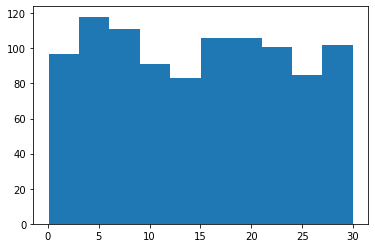

In [11]:
# stimulating wait time
import matplotlib.pyplot as plt
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### 2.4 The binomial distribution
- An outcome with two probabilities
- A probability distribution of the number of successes in a sequence of independent trails : **if trails are not independent, the binomal distribution does not apply**
- **Stimulation:** 
 - binom.rvs(# of coins, probability of heads/success, size = # of trails)
 - binom.rvs(# of coins, p, n)
- Probability distribution of the number of success in a sequence of independent trails 
 - n: total number of trails 
 - p: probability of success
- **probability mass function (pmf)**: a function over the sample space of a discrete random variable X which gives the probability that X is equal to a certain value.
 - binom.pmf(num heads, num trails, prob of heads)
 - binom.pmf(num heads, n, p)

In [18]:
# stimulate the random numbers
from scipy.stats import binom

# flip 1 coin with 50% chance of success 8 times
print(binom.rvs(1, 0.5, size = 8))

# flip 2 coin with 50% chance of success 3 times
print(binom.rvs(2, 0.5, size = 5))

[0 0 0 1 0 0 1 1]
[2 2 2 2 1]


In [21]:
# P(heads = 7)
print(binom.pmf(7, 10, 0.5))
# P(heads <= 7)
print(binom.cdf(7, 10, 0.5))
# P(heads > 7)
print(1 - binom.cdf(7, 10, 0.5))

0.11718749999999999
0.9453125
0.0546875


In [22]:
# Expected value = n * p
# Expected number of heads out of 10 flips
print(10 * 0.5)

5.0


In [9]:
from scipy.stats import binom
# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size = 52)

# Print mean deals won per week
print(np.mean(deals))

[1]
0.8461538461538461


In [26]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


**Expected values**

In [10]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## 3. More Distributions and the Central Limit Theorem

### 3.1 The normal distribution -> continuous distribution 
- The normal distribution
    - Symmetrical 
    - The area beneath the curve is 1
    - Curve never hits 0
    - It is described by mean and standard deviation: ~X(μ,σ)
    - Area from centre to outer: 65 - 95 - 99
- **Standard normal distribution**: μ = 0, σ = 1
  - **z-score**: measure the variabiltiy of the data point by comparing to the mean
- Statistical functions: 
  - **norm.cdf(# of interest, mean, standard deviation)**
  - **norm.ppf(Prob, mean, standard deviation):** **Probability point function** takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.
  - **norm.rvs(# of interest, p, n)**

In [11]:
from scipy.stats import norm

# P(women shorter than and equal to 154 cm)
# mean = 161, std = 7
print(norm.cdf(154, 161, 7))

# P(women higher than 154 cm)
print(1 - norm.cdf(154, 161, 7))

# P (between 157 and 154 cm)
print(norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7))

0.15865525393145707
0.8413447460685429
0.1251993291672192


In [34]:
# pencentages from heights using ppf 
from scipy.stats import norm

# the value of 90% is the number of mean = 161 and standard deviation of 7
# what height are 90% of women shorter than? 
print(norm.ppf(0.9, 161, 7))

# what height are 90% of women taller than? 
print(norm.ppf((1-0.9), 161, 7))

169.9708609588122
152.0291390411878


In [35]:
# generating random numbers

from scipy.stats import norm
print(norm.rvs(161, 7, size=10))

[161.2644083  160.05186056 160.92981833 172.69565731 156.34934204
 156.76111541 156.44306384 164.58797432 162.83672177 156.92087847]


In [36]:
import numpy as np

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)
print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)
print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


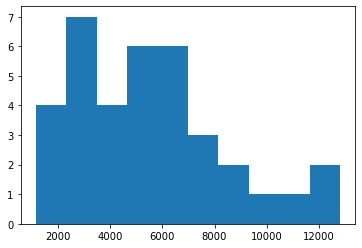

In [12]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### 3.2 The central limit theorem
- The sampling distribution of a statistic becomes closer to te normal distribution s the number of trials increases
  - samples should be random and 
  > 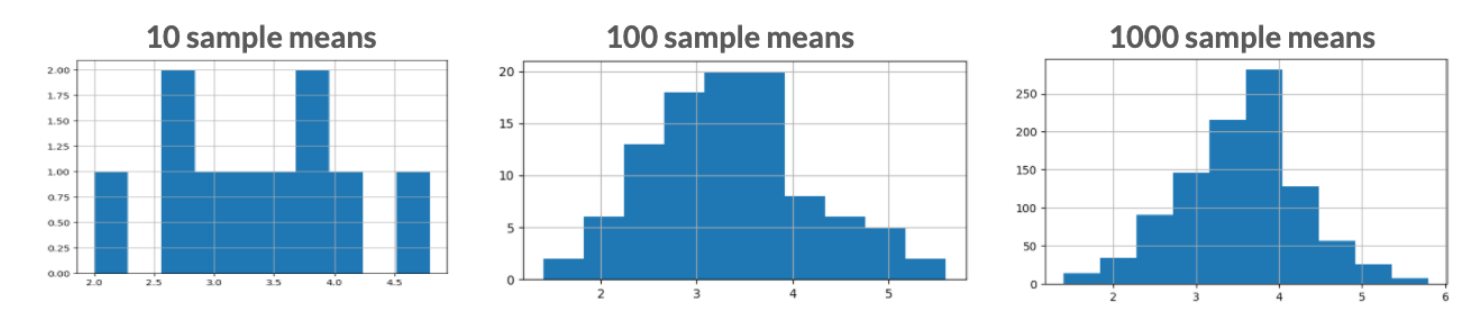
- Samples should be random and independent
- Apply to the sampling distribution of the sample mean
- Apply to the sampleing distribution of proportion

**The CLT in action**

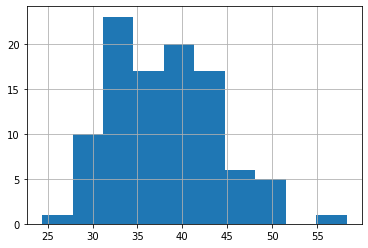

In [13]:
# Set seed to 104
np.random.seed(104)

# create a sampling distribution
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [14]:
sales_team = pd.Series(['Amir','Brian','Claire','Damian'])
print(sales_team.sample(10, replace = True))
# 10% Claire

2    Claire
3    Damian
1     Brian
3    Damian
1     Brian
1     Brian
0      Amir
0      Amir
0      Amir
3    Damian
dtype: object


In [15]:
print(sales_team.sample(10, replace = True))
# 20% Claire

3    Damian
0      Amir
3    Damian
2    Claire
0      Amir
1     Brian
3    Damian
0      Amir
0      Amir
2    Claire
dtype: object


In [16]:
print(sales_team.sample(10, replace = True))
# 30% Claire

2    Claire
0      Amir
1     Brian
1     Brian
3    Damian
0      Amir
0      Amir
2    Claire
2    Claire
3    Damian
dtype: object


**The mean of means**

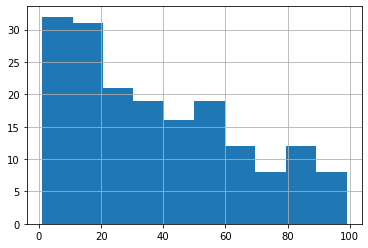

In [18]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

38.821666666666665
37.651685393258425


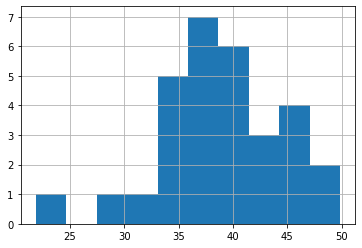

In [20]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20,replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

sample_means = pd.Series(sample_means)


# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### 3.3 The poisson distribution
- Events appear to happen at a certain rate, but completely at random
- Example: 
  - Number of animals adopted from an animal shelter per week 
    - Prob of >= 5 animals adopted from an animal shelter per week
    - Average number of adoptions per week = 8
  - Number of people arrriving at a restaurant per hour
    - Prob of 12 people arriving at a restaurant per hour
- Time unit is irrelevant, as long as you use the same unit when talking about the same situation 
- Probability of same # of events occuring over a fixed period of time 
- **Lambda λ** is the distribution's peak: average number of events per time interval 
  > λ = 8 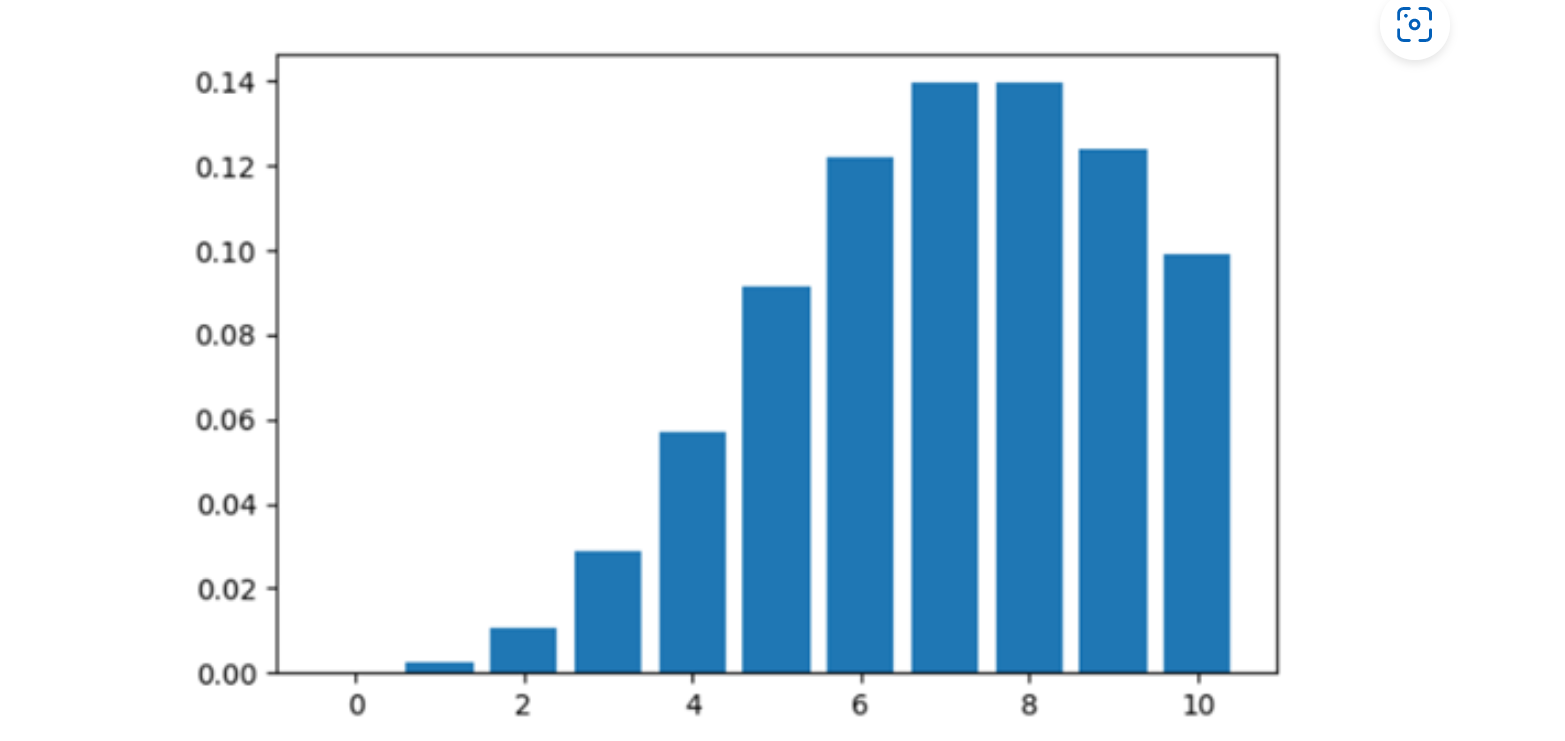
- The poisson functons: 
 - poisson.pmf(# of interest, λ)
 - poisson.cdf(# of interest, λ)
 - poisson.rvs(λ, size = n) 
- **The CLT sitll applies!** 

In [39]:
from scipy.stats import poisson

# if the Lambda λ = 8, what is the P(# of adoptions in a week = 5? 
print(poisson.pmf(5, 8))

# what is the P(# of adoptions in a week < 5)?
print(poisson.cdf(5, 8))

# what is the P(# of adoptions in a week > 5 )?
print(1 - poisson.cdf(5, 8))

0.09160366159257921
0.19123606207962532
0.8087639379203747


In [40]:
# Sampling from a poisson distribution when Lambda λ
from scipy.stats import poisson
poisson.rvs(8, size = 10)

array([ 6, 11,  7,  8,  6, 10,  5,  8,  6,  7])

In [24]:
# Import paroisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)
print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)
print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


### 3.4 More probability distributions 
- Exponential distribution 
  - Prob of time between poisson events
  - Example:
    - Prob of > 1 day between adoption
    - Prob of < 10 min between restaurant arrivals
      - On average, one arrival is created every 2 min
      - In terms of rate(Poisson): λ = 0.5 (= 1/2) arrival each minute
      - In terms of time(exponential): 1/λ = 1 arrival per 2 minutes
  - Also uses **Lambda λ(rate)**
  - Continuous(time)
  - Functions: 
    - expon.cdf(# of interest, scale = λ)
- (Student's) t-distribution
  - Similar shape as teh normal distribution but tails are thicker
  - Parameter **the degree of freedom (df)**: 
    - lower df, thicker tails and higher standard deviation
    - higher df, closer to the normal distribution
- Log-normal distribution
  - Variables whose logarithm is normally distributed 
  - Distributions are skewed 
  - Examples: 
    - Length of chess games
    - Adult blood pressure

In [42]:
from scipy.stats import expon

# P(wait < 1 min)
# scale is the lambda value 
print(expon.cdf(1, scale = 0.5))

# P(wait > 3 min)
print(1-expon.cdf(3, scale = 0.5))

# P(1 min < wait < 3 min)
print(expon.cdf(3, scale = 0.5) - expon.cdf(1, scale = 0.5) )

0.8646647167633873
0.0024787521766663767
0.13285653105994633


In [43]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale= 2.5))

# Print probability response takes > 4 hours
print(1-expon.cdf(4,scale = 2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4,scale = 2.5) - expon.cdf(3,scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


## 4. Correlation and Experimental Design

### 4.1 Correlation
- Correlation coefficient (from - 1 to 1) 
- **Only measure linear relationship**
- Visualization:
  - **sns.scatterplot()**
  - **sns.lmplot()** to add trendline
- Computing corrleation: 
  - **df[col1].corr(df[col2])**
  - Pearson product-moment correlation: r
    - Variation: Kendall's tau
    - Variation: Spearman's rho

In [ ]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.scatterplot(x='happiness_score',y='life_exp',data=world_happiness)

sns.lmplot(x='life_exp',y='happiness_score',data=world_happiness,ci=None)

# Show plot
plt.show()

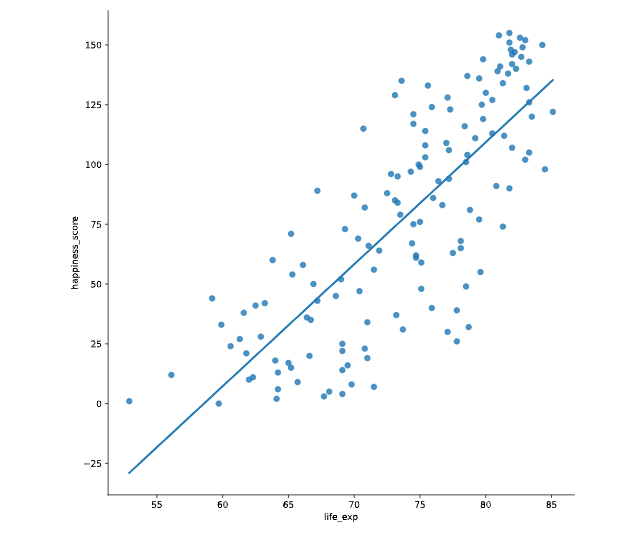

In [ ]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

### 4.2 Correlation caveats
- **Non-linear relationships**: visualize the relationship
  - r only can be used in the linear relationship
    > 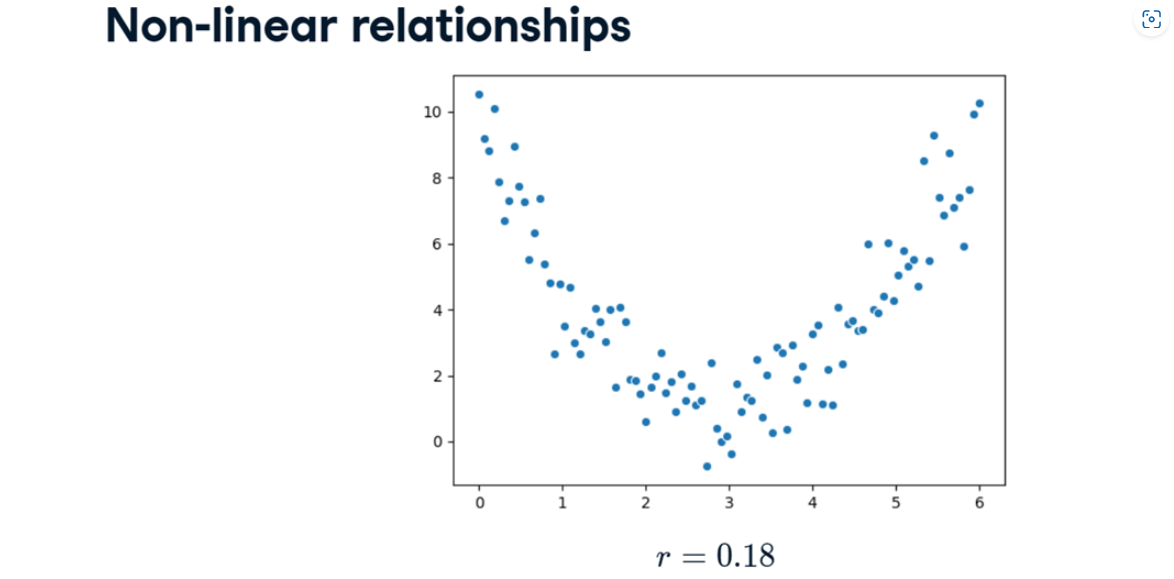
- Hnadl the dataste which is highly-skewed: **log transformation(no.log())**
- Other transformation: 
  - Log(x)
  - sqrt(x)
  - 1/x
  - Combinations of these: log(x) & log(y), sqrt(x) & 1/y
- **Why need a transformation?** - Certain statistical methods rely on variables having a liner relationship
  - Correlation coefficient 
  - Linear regression
- **Correlation does not imply causaion**
  - a spurious correlation
  - Confounding: a hidden variable 

In [2]:
path = '/QXJ/Python/Datacamp/Statistics/world_happiness.csv'
world_happiness = pd.read_csv(path, index_col = 0)
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


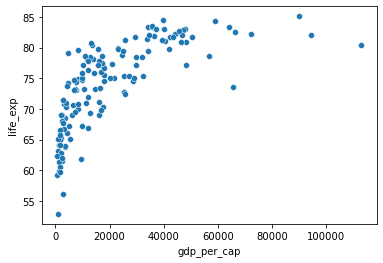

0.7019547642148012


In [3]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

# The scatterplot shows the date is highly-skewed which needs transformation

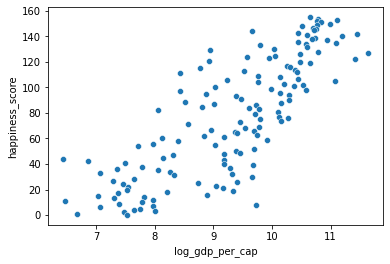

0.8043146004918288


In [4]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

### 4.3 Design of experiments
- Experiment aims to answer: what is the effect of the treatment to the response? 
      - **Treatment**: explanatory/independent variables
      - **Response**: response/dependent variable
      - What is the effect of an advertisement on the number of products purchased? 
    - **Controlled experiments**: Participants are assigned by researchers to either treatmetn group or control group
      - **A/B test**: Treatment group see the advertisement but not the controlled
      - Groups should be comparable so that causation can be inferred
      - Groups not comparable lead to the confounding or bias
    - Assistant tools: Fewer apportunities for bias = more reliable conclusion
      - **Randomized controlled trial** 
      - **Placebo**: resembles treatment but has no effect - participants do not know which group they are in 
      - **Double-blind trail**
- **Observation studies**: 
      - Participants are not assigned randomly to groups 
      - Participants assign themselves based on pre-existing characteristics
      - Suitable for not conductive to a controlled experiment 
      - Establish association, not causation
- Longitudinal vs. Cross-secitonal studies
  - **Longitudinal study**: participants are followed over a period of time to examine effect of treatment on response, more expensive and longer time
  - **Cross-sectional study**: Data on participants is collected from a single snapshot in time